Hello Reddit and Facebook users! If you like this challenge check out the contest we are having this weekend: 20/20 Hack - May Qualifier

Gabe and his 9 friends enjoy playing a video game called Defence of the Ancients. This game consists of two 5-player teams fighting each other on a virtual battlefield.

Before the game starts, each player picks a virtual hero as their character from a pool of about 100 heroes. Each hero can only be picked by one player in a game. Gabe and his friends are very similar in skill-level, so the outcome of their games has some dependence on which heroes were chosen. Gabe wonders if he can predict the outcome of a game based on what heroes have been picked.

Game Data
Gabe has extensive records of past games between similar players. You can download this training data with the results of 15,000 games that Gabe has already played. You need to analyze the data to find trends about each hero. Hero names contain spaces, apostrophes, and hyphens.

The data consists of 15,000 lines, each with 10 strings and one number all seperated by commas. On each line, the first 5 strings are the heroes picked by team 1, the second 5 strings are the heroes picked by the team 2, and the number at the end is the number of the team who won.

Challenge
In each of K games, you will be given the heroes picked by each team. Using the training data, can you predict which team will win based on the heroes that they have picked? You will be scored based on how many predictions you get right. You may access the trainingdata by reading from the file "trainingdata.txt".

Input
The first line will contain a single integer K, the number of games you need to predict. This is followed by K lines containing 10 comma separated strings of the 10 chosen heroes.

Output
For each game, output the number (1 or 2) of the team you think will win on a new line.

Constraints

1 ≤ K ≤ 3000

Sample Input
5
Spectre,Nature's Prophet,Ogre Magi,Nyx Assassin,Kunkka,Lone Druid,Windrunner,Disruptor,Juggernaut,Naga Siren
Windrunner,Medusa,Zeus,Shadow Fiend,Troll Warlord,Bounty Hunter,Pudge,Lycanthrope,Riki,Pugna
Ogre Magi,Sniper,Rubick,Lifestealer,Treant Protector,Slardar,Lion,Shadow Fiend,Weaver,Nature's Prophet
Sniper,Nyx Assassin,Lich,Axe,Necrolyte,Magnus,Juggernaut,Dazzle,Tinker,Nature's Prophet
Lina,Nature's Prophet,Chaos Knight,Gyrocopter,Invoker,Sven,Broodmother,Necrolyte,Undying,Windrunner

Sample Output
1
1
1
1
1

Scoring
Your score for this challenge will based on what percentage of your predictions are correct, according to this formula:

Score = 100 * ((#correct - #incorrect) / total)

If you are are correct for less than half the games, you will receive a score of 0. Your score will only be based on the second (hidden) test case. The sample test case is just for checking if your program is working as intended in our environment.

https://www.hackerrank.com/challenges/dota2prediction/problem

In [196]:
# import library
import numpy as np
import pandas as pd



In [197]:
# read training data
games = pd.read_csv('trainingdata.txt', header=None)
games

,0,1,2,3,4,5,6,7,8,9,10
0,Sven,Lone Druid,Venomancer,Clockwerk,Shadow Shaman,Invoker,Gyrocopter,Anti-Mage,Alchemist,Slark,2
1,Riki,Tinker,Puck,Leshrac,Nyx Assassin,Slardar,Sand King,Spectre,Necrolyte,Warlock,1
2,Invoker,Mirana,Pudge,Magnus,Keeper of the Light,Rubick,Tidehunter,Queen of Pain,Faceless Void,Sniper,2
3,Riki,Centaur Warrunner,Treant Protector,Queen of Pain,Broodmother,Rubick,Weaver,Troll Warlord,Alchemist,Drow Ranger,1
4,Razor,Kunkka,Drow Ranger,Leshrac,Zeus,Riki,Bane,Visage,Invoker,Timbersaw,1
5,Sand King,Shadow Shaman,Silencer,Gyrocopter,Meepo,Nyx Assassin,Slark,Mirana,Rubick,Queen of Pain,2
6,Morphling,Omniknight,Pudge,Crystal Maiden,Razor,Troll Warlord,Tidehunter,Lina,Dark Seer,Gyrocopter,1
7,Brewmaster,Leshrac,Ogre Magi,Kunkka,Riki,Disruptor,Juggernaut,Tiny,Enigma,Bounty Hunter,1
8,Slardar,Earthshaker,Invoker,Slark,Doom,Necrolyte,Timbersaw,Bounty Hunter,Huskar,Razor,1
9,Dazzle,Naga Siren,Ogre Magi,Pudge,Nature's Prophet,Chen,Puck,Timbersaw,Magnus,Ursa,2


In [198]:
#label encoding the hero names
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
games[0]=le.fit_transform(games[0])
for i in range(1,10):
    games[i]=le.transform(games[i])
games

,0,1,2,3,4,5,6,7,8,9,10
0,77,40,88,15,68,30,28,2,0,72,2
1,63,81,58,35,52,71,65,74,50,91,1
2,30,46,59,43,33,64,79,61,27,73,2
3,63,11,83,61,10,64,92,84,0,23,1
4,62,34,23,35,96,63,4,90,30,80,1
5,65,68,69,28,45,52,72,46,64,61,2
6,47,54,59,16,62,84,79,38,17,28,1
7,9,35,53,34,63,20,32,82,26,8,1
8,71,24,30,72,21,50,80,8,29,62,1
9,18,48,53,59,49,13,58,80,43,86,2


In [193]:
train = pd.DataFrame(np.zeros((15000, 97)))
for i in range(15000):
    for j in range(5):
        train.iloc[i,games.iloc[i,j]] = 1
for i in range(15000):
    for j in range(5,10):
        train.iloc[i,games.iloc[i,j]] = -1
train

,0,1,2,3,4,5,6,7,8,9,...,87,88,89,90,91,92,93,94,95,96
0,-1.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,1.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [204]:
y = games[10]
y.replace(2,0,inplace=True)
y


0        0
1        1
2        0
3        1
4        1
5        0
6        1
7        1
8        1
9        0
        ..
14990    1
14991    0
14992    1
14993    0
14994    0
14995    1
14996    1
14997    0
14998    1
14999    0
Name: 10, Length: 15000, dtype: int64

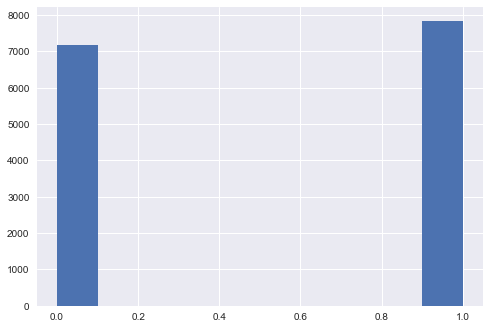

In [205]:
# Checking if classes are balenced
import matplotlib.pyplot as plt
plt.hist(y)
plt.show()

In [206]:
# train test split for cross validation
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train, y,test_size = 0.3, random_state=88, stratify=y)

In [211]:
from sklearn.linear_model import LogisticRegression
dota_logist = LogisticRegression(C=1e5)

In [215]:
dota_logist.fit(train, y)

LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [284]:
dota_logist.score(train, y)

0.61080000000000001

In [281]:
from sklearn.naive_bayes import BernoulliNB
dota2BNB=BernoulliNB()

In [282]:
dota2BNB.fit(train,y)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [286]:
dota2BNB.score(train,y)

0.58220000000000005

In [244]:
n = int(input())
test_input = pd.DataFrame(np.zeros((n,10)))
for i in range(n):
    test_input.iloc[i]=input().split(',')

5
Spectre,Nature's Prophet,Ogre Magi,Nyx Assassin,Kunkka,Lone Druid,Windrunner,Disruptor,Juggernaut,Naga Siren
Windrunner,Medusa,Zeus,Shadow Fiend,Troll Warlord,Bounty Hunter,Pudge,Lycanthrope,Riki,Pugna
Ogre Magi,Sniper,Rubick,Lifestealer,Treant Protector,Slardar,Lion,Shadow Fiend,Weaver,Nature's Prophet
Sniper,Nyx Assassin,Lich,Axe,Necrolyte,Magnus,Juggernaut,Dazzle,Tinker,Nature's Prophet
Lina,Nature's Prophet,Chaos Knight,Gyrocopter,Invoker,Sven,Broodmother,Necrolyte,Undying,Windrunner


In [266]:
n=3000
test_input = pd.read_csv('input02.txt', header=None)
test_input

,0,1,2,3,4,5,6,7,8,9
0,Dark Seer,Spirit Breaker,Medusa,Disruptor,Rubick,Sven,Outworld Devourer,Jakiro,Warlock,Shadow Demon
1,Huskar,Pudge,Chen,Bounty Hunter,Lion,Shadow Fiend,Leshrac,Ogre Magi,Sniper,Tidehunter
2,Keeper of the Light,Luna,Tiny,Rubick,Drow Ranger,Lich,Nature's Prophet,Huskar,Razor,Sniper
3,Chaos Knight,Silencer,Bane,Warlock,Weaver,Razor,Puck,Earthshaker,Night Stalker,Witch Doctor
4,Sniper,Nature's Prophet,Jakiro,Naga Siren,Dazzle,Meepo,Silencer,Batrider,Enigma,Necrolyte
5,Anti-Mage,Necrolyte,Nature's Prophet,Slark,Broodmother,Lion,Juggernaut,Invoker,Keeper of the Light,Faceless Void
6,Beastmaster,Sand King,Phantom Lancer,Viper,Sniper,Juggernaut,Omniknight,Lich,Mirana,Drow Ranger
7,Warlock,Phantom Lancer,Doom,Bounty Hunter,Faceless Void,Ancient Apparition,Ogre Magi,Silencer,Drow Ranger,Sniper
8,Nature's Prophet,Spectre,Visage,Weaver,Bloodseeker,Juggernaut,Bounty Hunter,Clockwerk,Dragon Knight,Pudge
9,Batrider,Silencer,Invoker,Slardar,Naga Siren,Spirit Breaker,Chaos Knight,Wisp,Juggernaut,Magnus


In [267]:
test = pd.DataFrame(le.transform(np.array(test_input).reshape(30000,)).reshape(3000,10))
test

,0,1,2,3,4,5,6,7,8,9
0,17,75,44,20,64,77,55,31,91,66
1,29,59,13,8,39,67,35,53,73,79
2,33,41,82,64,23,36,49,29,62,73
3,12,69,4,91,92,62,58,24,51,95
4,73,49,31,48,18,45,69,5,26,50
5,2,50,49,72,10,39,32,30,33,27
6,6,65,57,89,73,32,54,36,46,23
7,91,57,21,8,27,1,53,69,23,73
8,49,74,90,92,7,32,8,15,22,59
9,5,69,30,71,48,75,12,94,32,43


In [268]:
test_dummy = pd.DataFrame(np.zeros((n, 97)))
for i in range(n):
    for j in range(5):
        test_dummy.iloc[i,test.iloc[i,j]] = 1
for i in range(n):
    for j in range(5,10):
        test_dummy.iloc[i,test.iloc[i,j]] = -1
test_dummy

,0,1,2,3,4,5,6,7,8,9,...,87,88,89,90,91,92,93,94,95,96
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,-1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0


In [272]:
test_y = pd.read_csv('output02.txt', header=None)
test_y.replace(2,0,inplace=True)
y

0        0
1        1
2        0
3        1
4        1
5        0
6        1
7        1
8        1
9        0
        ..
14990    1
14991    0
14992    1
14993    0
14994    0
14995    1
14996    1
14997    0
14998    1
14999    0
Name: 10, Length: 15000, dtype: int64

In [273]:
dota_logist.score(test_dummy, test_y)

0.61499999999999999

In [263]:
print(*res, sep='\n')

1
0
1
1
1


In [274]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
dota2rf = RandomForestClassifier()
dota2gbm = GradientBoostingClassifier()

In [276]:
dota2rf.fit(x_train, y_train)
dota2rf.score(x_train, y_train)  
dota2rf.score(x_test, y_test)  

0.5411111111111111

In [278]:
dota2gbm.fit(x_train, y_train)
dota2gbm.score(x_train, y_train)  # 63.7%
dota2gbm.score(x_test, y_test)   # 54.0%

0.5882222222222222

In [287]:
grid_para_forest = [{
    'n_estimators': [50, 100, 200],
    'criterion': ['gini'],
    'max_features': list(range(1,9)),
    "random_state": [88]}]
grid_search_forest = GridSearchCV(dota2, grid_para_forest, scoring='accuracy', cv=3, n_jobs=-1, verbose = 10)

grid_search_forest.fit(x_train, y_train)
grid_search_forest.best_score_

Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   11.1s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   16.1s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   19.5s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   25.5s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   32.0s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:   42.0s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   51.3s
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:   59.2s finished


0.57371428571428573

In [279]:
grid_para_gbm = [{
    'n_estimators': [50, 100, 200, 500],
    'learning_rate': [0.1, 0.03, 0.01, 0.003],
    'max_depth': [3,5,7,9],
    
    "random_state": [88]}]
grid_search_gbm = GridSearchCV(dota2gbm, grid_para_gbm, scoring='accuracy', cv=3, n_jobs=-1, verbose = 10)

grid_search_gbm.fit(x_train, y_train)

Fitting 3 folds for each of 64 candidates, totalling 192 fits


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   13.7s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   32.2s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  8.5min
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed: 10.5min
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed: 13.4min
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed: 16.6min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed: 18.2min
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed: 21.5min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 25.2min
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed: 27.3min
[Parallel(n_jobs=-1)]: Done 192 out of 192 | elapsed: 33.2min finished

GridSearchCV(cv=3, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid=[{'n_estimators': [50, 100, 200, 500], 'learning_rate': [0.1, 0.03, 0.01, 0.003], 'max_depth': [3, 5, 7, 9], 'random_state': [88]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=10)

In [280]:
grid_search_gbm.best_score_

0.58152380952380955